<a href="https://colab.research.google.com/github/bianchin90/Projects/blob/master/BigDataAnalytics_Coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/bianchin90/Projects/master/sentiment_analysis_output"
df = pd.read_csv(url, sep="\t", error_bad_lines=False)
#df_full = df
df.head(15)

,review_id,product_id,star_rating,sentiment_rating
0,R4BTHIUOEK1,B00D0XEBV8,5,4.062500
1,R56O68TYZNS,B002MWYUFU,4,2.812500
2,R8JDR5Z7YZQ,B002WC58GK,3,3.125000
3,RD8IZCSG531,B00IS5E0XM,1,2.734375
4,RDFBKAUULDZ,B008AZ7HS0,5,3.625000
5,RDTXAF5CBDB,B00B0AL2VA,5,3.593750
6,RDVABA1XKXC,B000EEBUW4,4,2.500000
7,RE5SCQCSZ1P,B002LTQFUM,2,1.875000
8,RI7EYPDEKED,B0052RMI2Y,2,3.750000
9,RIVE71W7OJ6,B00QK6F67K,3,2.812500


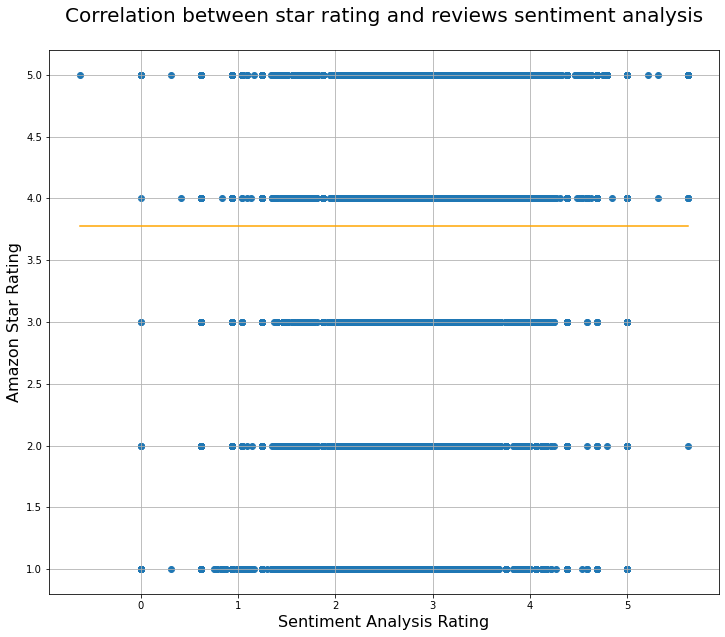


	Pearson correlation: 0.4164092657203107
	records acceptable (max Delta ±1): 38822 out of 87529 (44.0%)


In [3]:
###TEST FOR CORRELATION LINE
import matplotlib.pyplot as plt
from google.colab import files
from scipy import stats
import numpy as np

#plot results
#scatter = df.plot(x='sentiment_rating', y='star_rating', style='o', grid = True, legend=False, figsize=(12,10))
x=df['sentiment_rating']
y=df['star_rating']
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(12,10))
plt.scatter(x, y) 
plt.title('Correlation between star rating and reviews sentiment analysis\n', fontsize=20)
plt.xlabel('Sentiment Analysis Rating', fontsize=16)
plt.ylabel('Amazon Star Rating', fontsize=16)
plt.grid()

cor = stats.pearsonr(df["star_rating"], df["sentiment_rating"])[0]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, cor))(np.unique(x)), color='orange')
plt.show()

#scatter.set_xlabel("Sentiment Analysis Rating")
#scatter.set_ylabel("Amazon Star Rating")


#compute pearson correlation
print("\n\tPearson correlation: {0}".format(stats.pearsonr(df["star_rating"], df["sentiment_rating"])[0]))

df['difference'] = df['star_rating'] - df['sentiment_rating']

ok = df[(df['difference'] <= 1) & (df['difference'] >= -1)]
good_records = ok.shape[0]
total_records = df.shape[0]

print('\trecords acceptable (max Delta ±1): {0} out of {1} ({2}%)'.format(good_records, total_records, round((good_records/total_records), 2)*100))

df['acceptable'] = 'No'
df.loc[((df['difference'] <= 1) & (df['difference'] >= -1)),'acceptable']='Yes'



#df.head(20)

#df.to_csv('NLP_result.txt', sep='\t' ,header=True, index = False)
#files.download("NLP_result.txt")